<a href="https://colab.research.google.com/github/DIFACQUIM/Cursos/blob/main/4_Espacio_Qu%C3%ADmico_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de componentes principales (PCA)


---
Realizó: Ana Chávez

Contacto: anachavez3026@gmail.com

In [ ]:
!pip -q install rdkit.pypi==2021.9.4

In [ ]:
!pip -q install Pillow
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

In [ ]:
!pip install molplotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install dash-bootstrap-components  # diseño de aplicación dash.
import dash_bootstrap_components as dbc 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sys import argv

from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

* RDKIT: https://www.rdkit.org/docs/GettingStartedInPython.html
* PANDAS: https://pandas.pydata.org/
* NUMPY: https://numpy.org/
* SKLEARN: https://scikit-learn.org/stable/

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Leer bases de datos
#BIOFACQUIM
url_biofacquim = "https://raw.githubusercontent.com/DIFACQUIM/Cursos/main/Pre-simposio%20QF/Espacio_quimico/Datasets/BIOFACQUIM.V2_curada.csv"
BIOFACQUIM = pd.read_csv(url_biofacquim)
print(BIOFACQUIM.head(2))

        ID                                             SMILES    Data set
0  FQNP502       c1cc2c(cc1C1OCC3C(c4ccc5c(c4)OCO5)OCC13)OCO2  BIOFACQUIM
1  FQNP281  C=C(C)C(C)(C)CCC(C)C1CCC2(C)C3CCC4C(C)(C)C5CCC...  BIOFACQUIM


In [ ]:
# Leer bases de datos

#FDA
url_fda = "https://raw.githubusercontent.com/DIFACQUIM/Cursos/main/Pre-simposio%20QF/Espacio_quimico/Datasets/FDA_2022_july_05_curada.csv"
FDA = pd.read_csv(url_fda)
FDA.head(2)

,ID,SMILES,NEW_SMILES,Data set
0,DB00006,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,CCC(C)C(NC(=O)C(CCC(=O)O)NC(=O)C(CCC(=O)O)NC(=...,FDA
1,DB00007,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...,FDA


In [ ]:
# Leer base de datos
#DNMT1
url_dnmt1 = "https://raw.githubusercontent.com/DIFACQUIM/Cursos/main/Pre-simposio%20QF/Espacio_quimico/Datasets/DNMT1_curada.csv"
DNMT1 = pd.read_csv(url_dnmt1)
DNMT1.head(2)

,ID,SMILES,Data set
0,"""CHEMBL2336409",Cc1cc(=Nc2ccc(NC(=O)c3ccc(N=c4cc[nH]c5ccccc45)...,DNMT1
1,"""CHEMBL1361703",COc1ccccc1CNC(=O)COC(=O)c1cc(-c2ccco2)nc2ccccc12,DNMT1


In [ ]:
# Ejemplo de smiles
smi = list(FDA["NEW_SMILES"])[15]
print(smi)

NC(Cc1ccccc1)C(=O)O


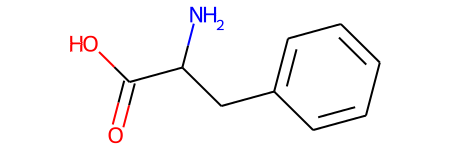

In [ ]:
# Ejemplo de una molécula
mol = Chem.MolFromSmiles(smi)
mol

In [ ]:
# Ver columnas
print(FDA.columns)
print(BIOFACQUIM.columns)
print(DNMT1.columns)

Index(['ID', 'SMILES', 'NEW_SMILES', 'Data set'], dtype='object')
Index(['ID', 'SMILES', 'Data set'], dtype='object')
Index(['ID', 'SMILES', 'Data set'], dtype='object')


In [ ]:
# Seleccionar columnas
FDA = FDA[['ID', 'NEW_SMILES', "Data set"]]
BIOFACQUIM = BIOFACQUIM[['ID', 'SMILES', "Data set"]]
DNMT1 = DNMT1[['ID', 'SMILES', "Data set"]]
# Cambiar nombre a columnas
FDA.columns = ["ID", "SMILES", "Data set"]
BIOFACQUIM.columns = ['ID',  'SMILES', "Data set"]
DNMT1.columns = ["ID", "SMILES", "Data set"]
FDA.head(2)

,ID,SMILES,Data set
0,DB00006,CCC(C)C(NC(=O)C(CCC(=O)O)NC(=O)C(CCC(=O)O)NC(=...,FDA
1,DB00007,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...,FDA


In [ ]:
DNMT1

,ID,SMILES,Data set
0,"""CHEMBL2336409",Cc1cc(=Nc2ccc(NC(=O)c3ccc(N=c4cc[nH]c5ccccc45)...,DNMT1
1,"""CHEMBL1361703",COc1ccccc1CNC(=O)COC(=O)c1cc(-c2ccco2)nc2ccccc12,DNMT1
2,"""CHEMBL1322848",COc1ccc(S(=O)(=O)N2CCN(C(=O)c3cc4c(s3)CCC4)CC2...,DNMT1
3,"""CHEMBL1373655",C=c1[nH]n(-c2cccc(C(=O)O)c2)c(=O)c1=CC=Cc1ccco1,DNMT1
4,"""CHEMBL1529285",O=C(O)c1ccc(NS(=O)(=O)c2ccc3c(c2)C2C=CCC2C(c2c...,DNMT1
...,...,...,...
386,"""CHEMBL4850038",COc1cc2c(=NCc3ccc(C4CCC(C(O)=NO)CC4)cc3)cc(-c3...,DNMT1
387,"""CHEMBL4856550",COc1cc2[nH]c(-c3ccc(C)o3)cc(=NC3CCC(C(O)=NO)CC...,DNMT1
388,"""CHEMBL4866673",COc1cc2c(=NCc3ccc(-c4ccc(C(O)=NO)cc4)cc3)cc(-c...,DNMT1
389,"""CHEMBL4878570",ON=C(O)C1CCN(CC(O)COC(Cn2c3ccccc3c3ccccc32)Cn2...,DNMT1


In [ ]:
# Unir (concatenar) bases de datos
DATA = pd.concat([FDA, BIOFACQUIM, DNMT1], axis=0).reset_index(drop=True)

In [ ]:
DATA

,ID,SMILES,Data set
0,DB00006,CCC(C)C(NC(=O)C(CCC(=O)O)NC(=O)C(CCC(=O)O)NC(=...,FDA
1,DB00007,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...,FDA
2,DB00014,CC(C)CC(NC(=O)C(COC(C)(C)C)NC(=O)C(Cc1ccc(O)cc...,FDA
3,DB00027,CC(C)CC(NC(=O)CNC(=O)C(NC=O)C(C)C)C(=O)NC(C)C(...,FDA
4,DB00035,N=C(N)NCCCC(NC(=O)C1CCCN1C(=O)C1CSSCCC(=O)NC(C...,FDA
...,...,...,...
3226,"""CHEMBL4850038",COc1cc2c(=NCc3ccc(C4CCC(C(O)=NO)CC4)cc3)cc(-c3...,DNMT1
3227,"""CHEMBL4856550",COc1cc2[nH]c(-c3ccc(C)o3)cc(=NC3CCC(C(O)=NO)CC...,DNMT1
3228,"""CHEMBL4866673",COc1cc2c(=NCc3ccc(-c4ccc(C(O)=NO)cc4)cc3)cc(-c...,DNMT1
3229,"""CHEMBL4878570",ON=C(O)C1CCN(CC(O)COC(Cn2c3ccccc3c3ccccc32)Cn2...,DNMT1


In [ ]:
# Generar descriptores
DATA["HBA"] = [Descriptors.NumHAcceptors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["HBD"] = [Descriptors.NumHDonors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["RB"] = [Descriptors.NumRotatableBonds(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["LogP"] = [Descriptors.MolLogP(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["TPSA"] = [Descriptors.TPSA(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["MW"] = [Descriptors.MolWt(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]

In [ ]:
DATA.head(2)

,ID,SMILES,Data set,HBA,HBD,RB,LogP,TPSA,MW
0,DB00006,CCC(C)C(NC(=O)C(CCC(=O)O)NC(=O)C(CCC(=O)O)NC(=...,FDA,29,27,66,-8.3261,904.07,2180.317
1,DB00007,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...,FDA,14,15,32,-1.4381,431.54,1209.421


In [ ]:
# Guardar base de datos
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
#DATA.to_csv("/content/drive/MyDrive/Pre-simposio QF/4.Espacio_quimico/Dataset.csv", sep=",", index=False)

Mounted at /content/drive


In [ ]:
dataset = DATA[["Data set", "HBA", "HBD", "RB", "LogP", "TPSA", "MW"]]
dataset.head(2)

,Data set,HBA,HBD,RB,LogP,TPSA,MW
0,FDA,29,27,66,-8.3261,904.07,2180.317
1,FDA,14,15,32,-1.4381,431.54,1209.421


### Generar PCA

In [ ]:
#Dividir matriz
data = dataset.iloc[:,1:7].values # Seleccionar columnas con descriptores
label = dataset.iloc[:,0].values # Seleccionar el nombre de la base de datos(label) de las columnas

In [ ]:
pd.DataFrame(data).head(2)

,0,1,2,3,4,5
0,29.0,27.0,66.0,-8.3261,904.07,2180.317
1,14.0,15.0,32.0,-1.4381,431.54,1209.421



StandardScaler() estandariza las características del conjunto de datos en la escala de la unidad (media = 0 y varianza = 1) que es un requisito para el rendimiento óptimo de muchos algoritmos de aprendizaje automático.

In [ ]:
# 1. Normalizar datos
data_std = StandardScaler().fit_transform(data)
print(data_std.shape)
pd.DataFrame(data_std).head(2)

(3231, 6)


,0,1,2,3,4,5
0,3.455616,5.412208,6.266717,-3.284825,5.978237,5.364707
1,1.232969,2.757524,2.709136,-1.195257,2.466179,2.435713


In [ ]:
# 2. Encontrar la matriz de covarianza
cov_mat = np.cov(data_std.T)
pd.DataFrame(cov_mat)

,0,1,2,3,4,5
0,1.000310,0.835375,0.759306,-0.478941,0.927920,0.885841
1,0.835375,1.000310,0.780322,-0.635608,0.950379,0.820521
2,0.759306,0.780322,1.000310,-0.243899,0.836523,0.877544
3,-0.478941,-0.635608,-0.243899,1.000310,-0.561858,-0.219741
4,0.927920,0.950379,0.836523,-0.561858,1.000310,0.905948
5,0.885841,0.820521,0.877544,-0.219741,0.905948,1.000310


In [ ]:
# 3. Encuentra los autovectores y los autovalores de la matriz de covarianza
#Eigenvectors and Eigenvalues
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print(eig_vals)
pd.DataFrame(eig_vecs)


[4.68784456 0.93445764 0.21679923 0.1095021  0.03452864 0.01872541]


,0,1,2,3,4,5
0,-0.433337,-0.034108,-0.654522,-0.420505,-0.423963,0.161517
1,-0.440135,0.161965,0.211434,0.672553,-0.446402,0.289381
2,-0.404267,-0.336626,0.683903,-0.491016,-0.113037,0.040650
3,0.253963,-0.855031,-0.124704,0.263975,-0.314417,-0.142596
4,-0.457485,0.031268,-0.075942,0.155053,0.098563,-0.866145
5,-0.425768,-0.356696,-0.194563,0.189806,0.706846,0.343480


In [ ]:
# 4. Ordenar los autovectores (eigenvectors) y los autovalores (eigenvalues) en orden descendente
# Hacer una lista de pares de valores propios y vectores propios
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs

[(4.687844555177455,
  array([-0.43333712, -0.44013528, -0.40426741,  0.253963  , -0.45748475,
         -0.42576783])),
 (0.9344576430078098,
  array([-0.03410828,  0.1619647 , -0.33662638, -0.85503052,  0.03126782,
         -0.35669578])),
 (0.2167992293875036,
  array([-0.65452201,  0.21143381,  0.68390344, -0.12470361, -0.07594196,
         -0.19456258])),
 (0.1095021039376599,
  array([-0.42050506,  0.67255349, -0.49101603,  0.26397508,  0.15505287,
          0.18980599])),
 (0.03452864143638192,
  array([-0.42396265, -0.44640198, -0.11303737, -0.31441728,  0.09856256,
          0.70684559])),
 (0.01872541219251357,
  array([ 0.16151681,  0.28938069,  0.04065017, -0.14259576, -0.86614484,
          0.34347965]))]

In [ ]:
# ordenar las listas en orden descendente basandose en la magnitud de los valores propios
eig_pairs.sort(key=lambda x: x[0], reverse=True)
# Autovalores en orden descendiente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])


Autovalores en orden descendiente:
4.687844555177455
0.9344576430078098
0.2167992293875036
0.1095021039376599
0.03452864143638192
0.01872541219251357


In [ ]:
# 5. Calcular la varianza explicada
# A partir de los autovalores, calculamos la varianza explicada
# La varianza explicada nos dice cuanta información podemos recuperar a partir de cada uno de los componentes principales
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
print(var_exp)
cum_var_exp = np.cumsum(var_exp)  # varianza acomulada, suma=100
print(cum_var_exp)

[78.10656098846161, 15.569473779610144, 3.612202160949324, 1.8244702141681686, 0.5752992460513437, 0.31199361075940774]
[ 78.10656099  93.67603477  97.28823693  99.11270714  99.68800639
 100.        ]


In [ ]:
eig_pairs[1][1].reshape(6,1)

array([[-0.03410828],
       [ 0.1619647 ],
       [-0.33662638],
       [-0.85503052],
       [ 0.03126782],
       [-0.35669578]])

*  Generamos la matriz de covarianza a partir de los pares autovalor-autovector.
*  La matriz de covarianza nos la los pesos que tiene cada variable para cada componente principal.
*  Recordemos que tenemos 6 descriptores moleculares (HBA, HBD, RB, LogP, TPSA, MW) que vamos a reducir a dos dimensiones (PC_1 y PC_2). por lo tanto obtendremos una matriz de 6x2.

In [ ]:
# 6. Generar la matriz de covarianza
matrix_w = np.hstack((eig_pairs[0][1].reshape(6,1),
                      eig_pairs[1][1].reshape(6,1)))
print("Matriz W:\n", matrix_w)
print(matrix_w.shape)

Matriz W:
 [[-0.43333712 -0.03410828]
 [-0.44013528  0.1619647 ]
 [-0.40426741 -0.33662638]
 [ 0.253963   -0.85503052]
 [-0.45748475  0.03126782]
 [-0.42576783 -0.35669578]]
(6, 2)


In [ ]:
# las cordenadas (Y) de cada compuesto de FDA y BIOFACQUIM en PC_1 y PC_2
data = data_std.dot(matrix_w)
print(data.shape)

(3231, 2)


In [ ]:
# y = labels (nombre de la base de datos)
print(label)

['FDA' 'FDA' 'FDA' ... 'DNMT1' 'DNMT1' 'DNMT1']


In [ ]:
DATA

,ID,SMILES,Data set,HBA,HBD,RB,LogP,TPSA,MW
0,DB00006,CCC(C)C(NC(=O)C(CCC(=O)O)NC(=O)C(CCC(=O)O)NC(=...,FDA,29,27,66,-8.32610,904.07,2180.317
1,DB00007,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...,FDA,14,15,32,-1.43810,431.54,1209.421
2,DB00014,CC(C)CC(NC(=O)C(COC(C)(C)C)NC(=O)C(Cc1ccc(O)cc...,FDA,16,17,31,-3.10570,495.89,1269.433
3,DB00027,CC(C)CC(NC(=O)CNC(=O)C(NC=O)C(C)C)C(=O)NC(C)C(...,FDA,16,20,51,4.86760,519.89,1811.253
4,DB00035,N=C(N)NCCCC(NC(=O)C1CCCN1C(=O)C1CSSCCC(=O)NC(C...,FDA,15,14,19,-4.13203,435.41,1069.238
...,...,...,...,...,...,...,...,...,...
3226,"""CHEMBL4850038",COc1cc2c(=NCc3ccc(C4CCC(C(O)=NO)CC4)cc3)cc(-c3...,DNMT1,7,3,11,7.33002,115.81,612.771
3227,"""CHEMBL4856550",COc1cc2[nH]c(-c3ccc(C)o3)cc(=NC3CCC(C(O)=NO)CC...,DNMT1,6,3,5,4.55872,112.57,425.485
3228,"""CHEMBL4866673",COc1cc2c(=NCc3ccc(-c4ccc(C(O)=NO)cc4)cc3)cc(-c...,DNMT1,7,3,11,7.07132,115.81,606.723
3229,"""CHEMBL4878570",ON=C(O)C1CCN(CC(O)COC(Cn2c3ccccc3c3ccccc32)Cn2...,DNMT1,7,3,10,6.40640,95.38,590.724


In [ ]:
#Convertir array a dataframe
# Para ver las cordenadas (Y) de cada compuesto de FDA y BIOFACQUIM en PC_1 y PC_2
PCA_dataset = pd.DataFrame(data, columns=["PC_1", "PC_2"])
PCA_dataset["Data set"] = DATA["Data set"]
PCA_dataset["ID"] = DATA["ID"]
PCA_dataset["SMILES"] = DATA["SMILES"]
PCA_dataset.shape

(3231, 5)

In [ ]:
set(list(PCA_dataset["Data set"]))

{'BIOFACQUIM', 'DNMT1', 'FDA'}

In [ ]:
def color(label):
  if label == str("BIOFACQUIM"):
    return int(0)
  if label == str("FDA"):
    return int(1)
  if label == str("DNMT1"):
    return (int(2))

In [ ]:
PCA_dataset["color"] = [color(x) for x in PCA_dataset["Data set"]]
PCA_dataset.head(2)

,PC_1,PC_2,Data set,ID,SMILES,color
0,-12.266275,-0.268838,FDA,DB00006,CCC(C)C(NC(=O)C(CCC(=O)O)NC(=O)C(CCC(=O)O)NC(=...,1
1,-5.312029,-0.277115,FDA,DB00007,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...,1


In [ ]:
PCA_dataset = PCA_dataset[PCA_dataset["PC_2"]>= float(-5)]
PCA_dataset = PCA_dataset[PCA_dataset["PC_1"]<= float(10)]
PCA_dataset.shape

(3222, 6)

In [ ]:
import pandas as pd
import plotly.express as px
import molplotly

In [ ]:
fig = px.scatter(PCA_dataset, x="PC_1", y="PC_2", color="color",
                 color_continuous_scale=['orange', "indigo", "green"]
                 )
# add molecules to the plotly graph - returns a Dash app
app = molplotly.add_molecules(fig=fig,
                            df=PCA_dataset,
                            smiles_col='SMILES',
                            title_col='Data set',
                            color_col="ID"
                            )

# run Dash app inline in notebook (or in an external server)
app.run_server(mode='inline', port=8700, height=1000)

Dash is running on http://127.0.0.1:8700/



INFO:dash.dash:Dash is running on http://127.0.0.1:8700/



<IPython.core.display.Javascript object>